**Danny Hong Thesis**

The following code implements a Transformer model for mutivariate time series forecasting of Adjusted Closing Stock Prices. The datasets used for this project were all taken from Yahoo Finance and contain stock data for Apple (AAPL), Amazon (AMZN), JP Morgan & Chase (JPM), and Goldman Sachs (GS) from 01-01-2013 to 01-01-2023. No data standardization has been done yet for normalization purposes, but may be explored in the future to improve results.

In [ ]:
#Installing the yfinance library and importing other necessary libraries
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import backend as K
from keras.layers import Conv1D, Flatten, MaxPooling1D, LSTM, TimeDistributed, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Pulling down stock data from the yfinance library
#The Volume data will not be used as a parameter for model training.
#Only the Open, High, Low, Close, and Adj Close parameters will be used.
def get_stock_data(stock_name, start_date, end_date):
  print(str(stock_name) + " Stock Data:\n")
  stock_df = yf.download(stock_name, start_date, end_date).dropna()
  stock_df = stock_df.drop('Volume', axis = 1) #Dropping the Volume data
  display(stock_df)
  print("\nTotal Number of Trading Days: ", len(stock_df))
  plt.plot(stock_df['Adj Close'])
  plt.title("Adjusted Close Stock Prices from 2013-2023 for " + str(stock_name))
  plt.xlabel("Time")
  plt.ylabel("Stock Prices")
  plt.show()

  return stock_df

AAPL Stock Data:

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791185
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579245
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117432
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022629
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.065748
...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504547



Total Number of Trading Days:  2518


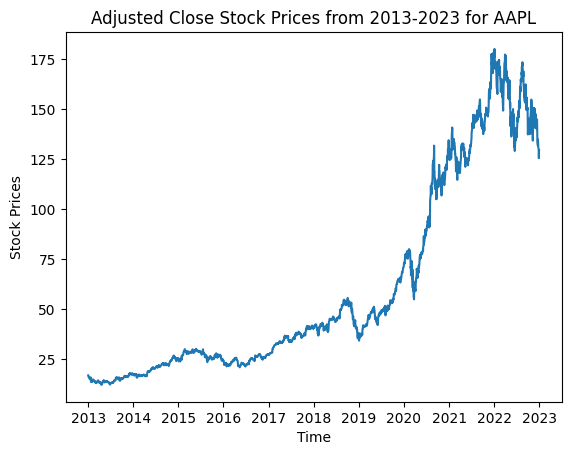

In [ ]:
AAPL_stock_df = get_stock_data(stock_name = 'AAPL', start_date = '2013-01-01', end_date = '2023-01-01')

AMZN Stock Data:

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500
2013-01-03,12.863500,13.044000,12.818500,12.924000,12.924000
2013-01-04,12.879000,12.990000,12.832500,12.957500,12.957500
2013-01-07,13.148500,13.486500,13.133500,13.423000,13.423000
2013-01-08,13.353500,13.449000,13.178500,13.319000,13.319000
...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000



Total Number of Trading Days:  2518


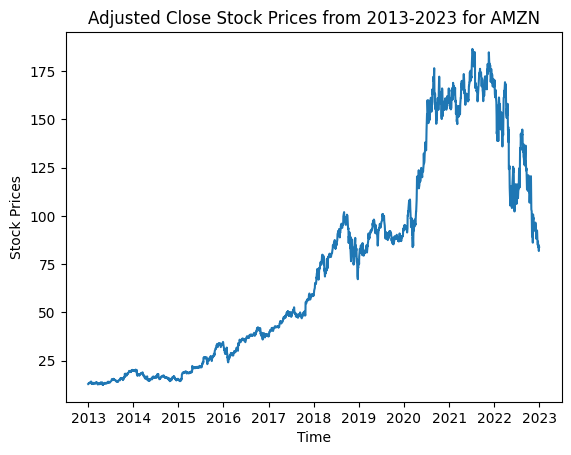

In [ ]:
AMZN_stock_df = get_stock_data(stock_name = 'AMZN', start_date = '2013-01-01', end_date = '2023-01-01')

JPM Stock Data:

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2013-01-02,44.980000,45.000000,44.220001,44.660000,33.084877
2013-01-03,44.740002,44.750000,44.200001,44.570000,33.018200
2013-01-04,44.450001,45.430000,44.439999,45.360001,33.603439
2013-01-07,45.090000,45.490002,45.020000,45.410000,33.640476
2013-01-08,45.400002,45.500000,44.959999,45.500000,33.707153
...,...,...,...,...,...
2022-12-23,130.580002,131.440002,129.639999,131.279999,127.480034
2022-12-27,131.570007,132.220001,130.550003,131.740005,127.926720
2022-12-28,131.850006,133.410004,131.009995,132.460007,128.625870



Total Number of Trading Days:  2518


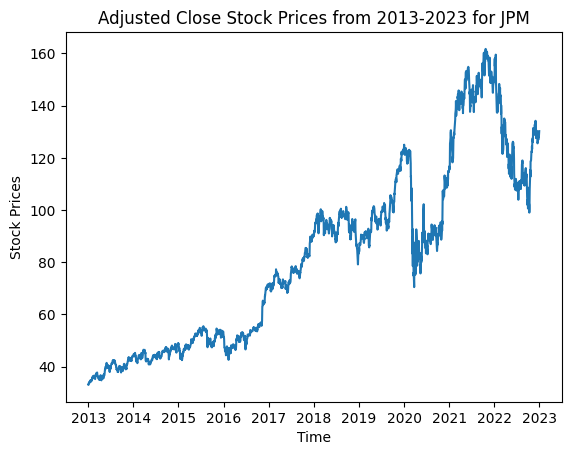

In [ ]:
JPM_stock_df = get_stock_data(stock_name = 'JPM', start_date = '2013-01-01', end_date = '2023-01-01')

GS Stock Data:

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2013-01-02,131.300003,131.660004,129.619995,131.660004,108.707947
2013-01-03,131.699997,131.779999,130.070007,130.940002,108.113426
2013-01-04,130.929993,134.639999,130.320007,134.509995,111.061104
2013-01-07,134.119995,134.509995,132.880005,134.259995,110.854698
2013-01-08,133.710007,133.949997,132.699997,133.050003,109.855644
...,...,...,...,...,...
2022-12-23,344.839996,347.760010,343.109985,345.510010,337.645874
2022-12-27,346.510010,347.750000,341.790009,341.970001,334.186462
2022-12-28,340.500000,342.850006,339.299988,340.869995,333.111481



Total Number of Trading Days:  2518


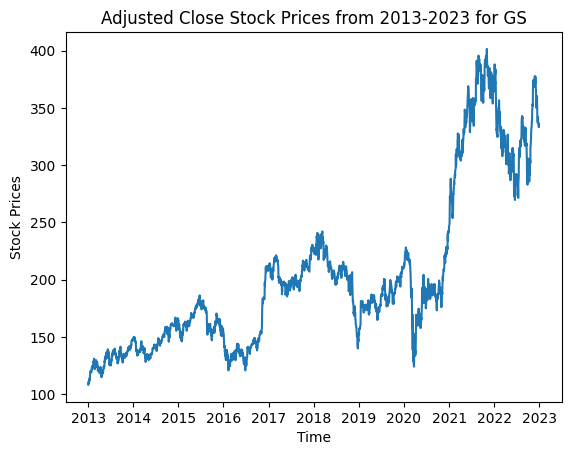

In [ ]:
GS_stock_df = get_stock_data(stock_name = 'GS', start_date = '2013-01-01', end_date = '2023-01-01')

In [ ]:
#Defining the Transformer Encoder Architecture
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout = 0):

  #Normalization and Multi-Head Attention Layers
  x = layers.LayerNormalization(epsilon = 1e-6)(inputs) #Normalization/Embedding Layer
  x = layers.MultiHeadAttention(key_dim = head_size, num_heads = num_heads, dropout = dropout)(x, x) #Attention Layer
  x = layers.Dropout(dropout)(x)
  res = x + inputs

  return res

#Decaying the Learning Rate over time
def LR_scheduler(epoch):

  initial_learning_rate = 1e-3
  decay_factor = 0.5
  step_size = 20

  learning_rate = initial_learning_rate * (decay_factor ** np.floor(epoch / step_size))

  return learning_rate

#Root Mean Squared Error function is used as the loss function
def RMSE(y_true, y_pred):
  root_mean_squared_error = K.sqrt(K.mean(K.square(y_pred - y_true)))

  return root_mean_squared_error

def preprocess_data(stock_df, num_features):
  #Forming data sets in which each sample has 10 timesteps and 1 output.
  #For each element of training set, there are 10 previous elements

  timesteps = 10
  X = []
  Y = []
  for i in range(0 , len(stock_df) - timesteps - 1 , 1):
    X.append(stock_df.iloc[i:i + timesteps, :])
    Y.append(stock_df.iloc[i + timesteps, 4])
  X, Y = np.array(X), np.array(Y)

  #Splitting the data into 95% training and 5% for testing.
  #Some of the tranining data will be separated and used as the validation
  #set. The validation set will have the same size as the testing set, so the
  #final breakdown would be 90% training, 5% validation, and 5% testing.

  split_fraction = 0.95
  split_index = int(len(X) * split_fraction)

  train_X, test_X = X[:split_index], X[split_index:]
  train_label, test_label = Y[:split_index], Y[split_index:]

  original_train_size = len(train_X)
  new_train_size = len(train_X) - len(test_X)

  val_X, val_label = train_X[new_train_size:original_train_size], train_label[new_train_size:original_train_size]
  train_X, train_label = train_X[0:new_train_size], train_label[0:new_train_size]

  train_X, val_X, test_X = np.array(train_X), np.array(val_X), np.array(test_X)

  train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], num_features))
  val_X = val_X.reshape((val_X.shape[0], val_X.shape[1], num_features))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], num_features))

  train_label, val_label, test_label = np.array(train_label), np.array(val_label), np.array(test_label)

  print("--------------------------------------------------------------------------------------------------")
  print("Length of Training Set: ", len(train_X))
  print("Length of Validation Set: ", len(val_X))
  print("Length of Testing Set: ", len(test_X))
  print("--------------------------------------------------------------------------------------------------")

  print("\nTraining Step:")
  print("--------------------------------------------------------------------------------------------------")

  return train_X, val_X, test_X, train_label, val_label, test_label

def build_model(stock_df, stock_name, num_features):
  print('Running the Model for the ' + str(stock_name) + ' Data:\n')

  train_X, val_X, test_X, train_label, val_label, test_label = preprocess_data(stock_df, num_features)

  adam = keras.optimizers.Adam(learning_rate = 1e-3)
  callbacks = [keras.callbacks.EarlyStopping(patience = 25, restore_best_weights = True),
               keras.callbacks.LearningRateScheduler(LR_scheduler)]

  num_transformer_blocks = 4
  inputs = keras.Input(shape = train_X.shape[1:])
  x = inputs

  #Stacking the transformer blocks
  for _ in range(num_transformer_blocks):
    x = transformer_encoder(inputs = x, head_size = 256, num_heads = 4, ff_dim = 2, dropout = 0.2)

  x = layers.GlobalAveragePooling1D(data_format = "channels_first")(x)
  x = layers.Dense(units = 512, activation = "relu")(x)
  x = layers.Dropout(0.1)(x)

  outputs = layers.Dense(units = 1, activation = "linear")(x)

  model = keras.Model(inputs, outputs)
  model.compile(loss = RMSE, optimizer = adam, metrics = ['MAE', 'MAPE'])
  model.summary()
  model.fit(train_X, train_label, validation_data = (val_X, val_label), epochs = 100,
            batch_size = 16, shuffle = False, verbose = 1, callbacks = callbacks)

  print("--------------------------------------------------------------------------------------------------")
  print("\nPrediction Step:")
  print("--------------------------------------------------------------------------------------------------")

  predictions  = model.predict(test_X, verbose = 0)
  scores = model.evaluate(test_X, test_label, verbose = 1)

  print("--------------------------------------------------------------------------------------------------\n")

  #Displaying predicted vs actual data for the testing set
  plt.figure(figsize = (10, 5))
  plt.plot(stock_df.index[-len(test_label):], test_label)
  plt.plot(stock_df.index[-len(predictions):], predictions)
  plt.title('Adjusted Close Stock Price Predictions for ' + str(stock_name))
  plt.xlabel('Time')
  plt.ylabel('Stock Price')
  plt.legend(['Predicted', 'Actual'])
  plt.show()

  return scores

Running the Model for the AAPL Data:

--------------------------------------------------------------------------------------------------
Length of Training Set:  2255
Length of Validation Set:  126
Length of Testing Set:  126
--------------------------------------------------------------------------------------------------

Training Step:
--------------------------------------------------------------------------------------------------
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10, 5)]              0         []                            
                                                                                                  
 layer_normalization (Layer  (None, 10, 5)                10        ['input_1[0][0]']             
 Normalization)                                   

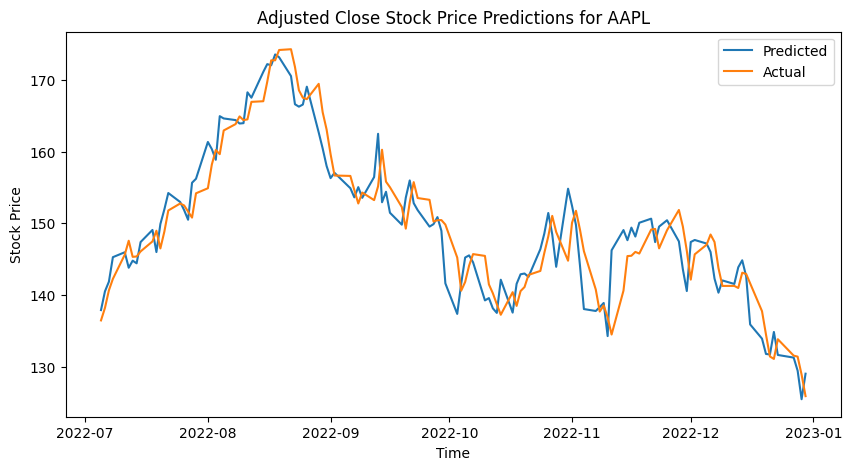

In [ ]:
AAPL_score = build_model(stock_df = AAPL_stock_df, stock_name = "AAPL", num_features = 5)

Running the Model for the AMZN Data:

--------------------------------------------------------------------------------------------------
Length of Training Set:  2255
Length of Validation Set:  126
Length of Testing Set:  126
--------------------------------------------------------------------------------------------------

Training Step:
--------------------------------------------------------------------------------------------------
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 10, 5)]              0         []                            
                                                                                                  
 layer_normalization_4 (Lay  (None, 10, 5)                10        ['input_2[0][0]']             
 erNormalization)                               

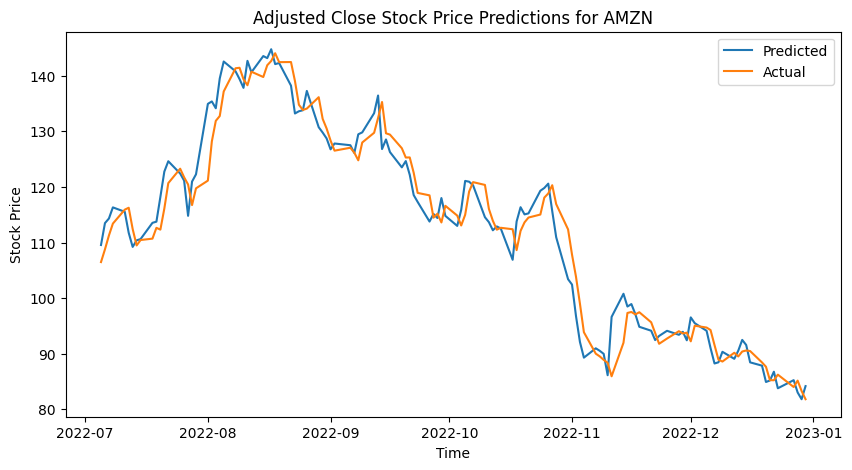

In [ ]:
AMZN_score = build_model(stock_df = AMZN_stock_df, stock_name = "AMZN", num_features = 5)

Running the Model for the JPM Data:

--------------------------------------------------------------------------------------------------
Length of Training Set:  2255
Length of Validation Set:  126
Length of Testing Set:  126
--------------------------------------------------------------------------------------------------

Training Step:
--------------------------------------------------------------------------------------------------
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 10, 5)]              0         []                            
                                                                                                  
 layer_normalization_8 (Lay  (None, 10, 5)                10        ['input_3[0][0]']             
 erNormalization)                                

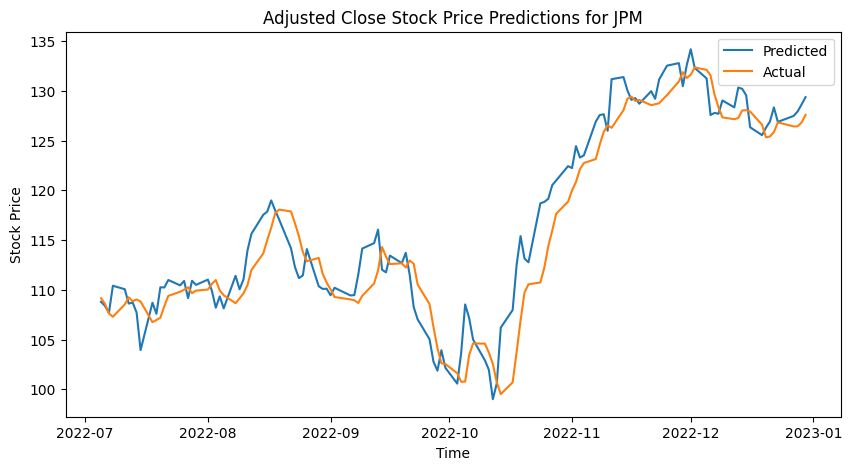

In [ ]:
JPM_score = build_model(stock_df = JPM_stock_df, stock_name = "JPM", num_features = 5)

In [ ]:
GS_score = build_model(stock_df = GS_stock_df, stock_name = "GS", num_features = 5)

In [14]:
#Compiling all the Test Loss Scores together and displaying in a dataframe
stocks = ["AAPL", "AMZN" "JPM", "GS"]
test_losses = [AAPL_score, AMZN_score, JPM_score, GS_score]

test_losses_df = pd.DataFrame()
test_losses_df["Stocks"] = ["AAPL", "AMZN", "JPM", "GS"]
test_losses_df["RMSE"] = [AAPL_score[0], AMZN_score[0], JPM_score[0], GS_score[0]]
test_losses_df["MAE"] = [AAPL_score[1], AMZN_score[1], JPM_score[1], GS_score[1]]
test_losses_df["MAPE"] = [AAPL_score[2], AMZN_score[2], JPM_score[2], GS_score[2]]

print("CNN-Transformer Model Test Loss Scores From Training:")
display(test_losses_df)

CNN-Transformer Model Test Loss Scores From Training:


,Stocks,RMSE,MAE,MAPE
0,AAPL,3.546078,2.866556,1.931691
1,AMZN,3.546940,2.826127,2.507961
2,JPM,2.725747,2.248600,1.949334
3,GS,6.914973,5.602196,1.755435
